# Project 6 Times Series Analysis (TSA) of Housing Market 

# Imports

In [ ]:
!ls

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#Quick Look on the Sotred DataFiles

# Data Cleaning

All .CSVs in the `Data` will be selected and processed to be in a pandas DataFrame with DateTimeIndex suitable for TSA. 

In [2]:
from os import listdir
#get all cvs
csvs = list(filter(lambda x: ".csv" in x , listdir("Data/Chicago")))

#convert them into DFs and store them with their names
dfs = dict(zip(csvs,[pd.read_csv("Data/Chicago/"+name) for name in csvs]))

Inspecting the Data:

In [3]:
for df in dfs.keys():
    print(dfs[df].head(5))
    print(dfs[df].tail(5))
    print("------------")
    print()

         DATE  NGMP16980
0  2001-01-01     414435
1  2002-01-01     423186
2  2003-01-01     436293
3  2004-01-01     460632
4  2005-01-01     486302
          DATE  NGMP16980
12  2013-01-01     585948
13  2014-01-01     608805
14  2015-01-01     639033
15  2016-01-01     657589
16  2017-01-01     679699
------------

         DATE  CHIC917URN
0  1990-01-01         6.6
1  1990-02-01         6.5
2  1990-03-01         6.3
3  1990-04-01         6.3
4  1990-05-01         6.1
           DATE  CHIC917URN
348  2019-01-01         4.8
349  2019-02-01         4.3
350  2019-03-01         4.1
351  2019-04-01         3.7
352  2019-05-01         3.5
------------

         DATE    CHXRNSA
0  1987-01-01  53.545909
1  1987-02-01  54.640379
2  1987-03-01  54.802209
3  1987-04-01  54.880347
4  1987-05-01  55.426280
           DATE     CHXRNSA
383  2018-12-01  142.454323
384  2019-01-01  141.671480
385  2019-02-01  141.726965
386  2019-03-01  142.566165
387  2019-04-01  144.276472
------------



In order to join the Data the dates have to be set to a common scale and date range. The bottle neck here is the GDP Data. It will be inflated to monthly data and then the Range from 1997 onwards is selected.

Process the data and rename it for better readability

In [4]:
from functions import preprocess
preprocessed = [preprocess(dfs[df]) for df in dfs.keys()]

In [5]:
chicago = pd.concat(preprocessed,axis = 1)["1997":"2017"]
chicago.columns = ["GDP", "Unemployment","PriceIndex"  ]

# Exploratory Data Analysis (EDA)

The data is visually inspected to determine trends,  seasonality and 

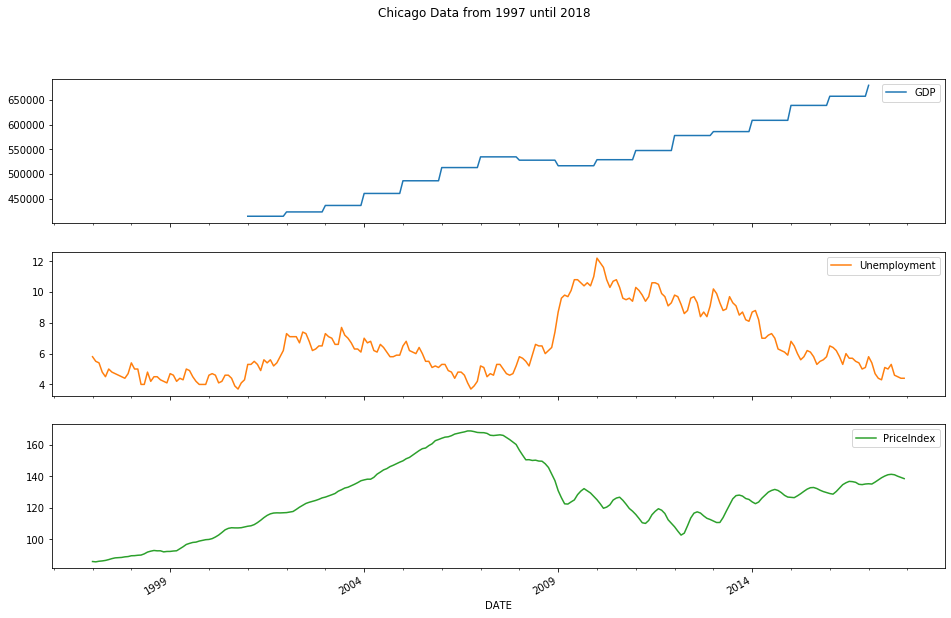

In [6]:
chicago.plot(subplots = True, figsize=(16,10), legend = True, title = "Chicago Data from 1997 until 2018");

The above plot shows:

|Name|Trend|Seasonality|
|:----|-----|-----------|
|GDP|upwards|none|
|Prices|upwards|none|
|Unemployment|steady|yearly|

In order to remove trends and seasonality, the data needs to be transformed further. The goal is to make each series stationary.

Dickey-Fuller-Test is used to determine how stationary a series is. The critical value here is the p-value. If it is less than the confidence level of 0.05 we consider the series to be stationary.

In [7]:
from functions import eval_stationary

p-value for Dickey-Fuller test: 0.943
Series is stationary?: No


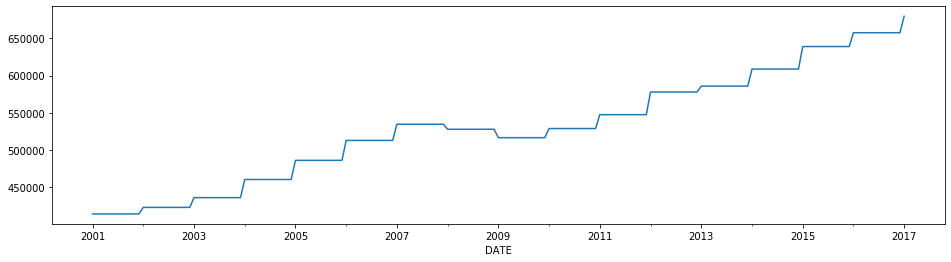

In [8]:
#original Value for the GDP column:
chicago["GDP"].plot(figsize=(16,4));
eval_stationary(chicago["GDP"])

p-value for Dickey-Fuller test: 0.229
Series is stationary?: No


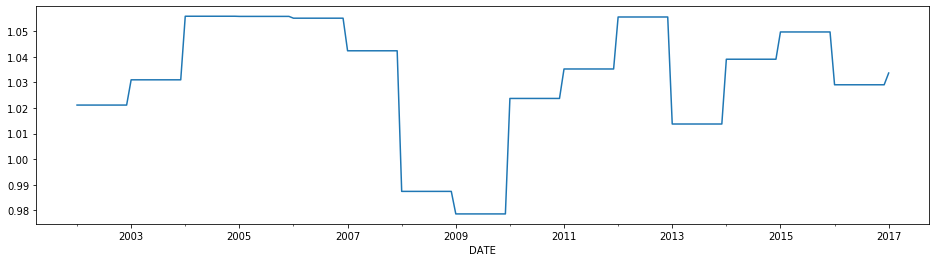

In [25]:
# creating a growth rate
chicago['gdp_growth'] = list(chicago.iloc[0:12]["GDP"]) + [chicago.iloc[n]["GDP"]/chicago.iloc[n-12]["GDP"] for n in range(12,len(chicago))]
eval_stationary(chicago['gdp_growth'])
#plot result
chicago['gdp_growth'].plot(figsize=(16,4))

p-value for Dickey-Fuller test: 0.0
Series is stationary?: Yes


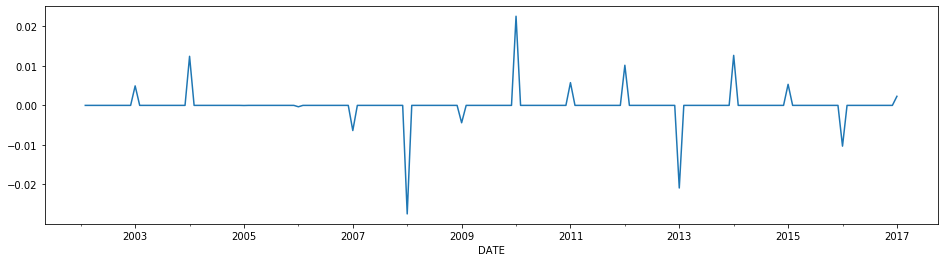

In [27]:
#applying rolling mean to growth rate
window = 2
new_name = "GDP_rate"+"_roll_"+ str(window)
chicago[new_name] = chicago["gdp_growth"] - chicago["gdp_growth"].rolling(window = window).mean()
eval_stationary(chicago[new_name])

#plot result
chicago[new_name].plot(figsize=(16,4));

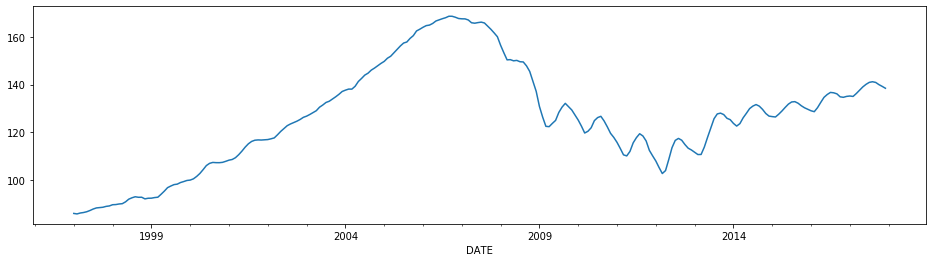

p-value for Dickey-Fuller test: 0.09
Series is stationary?: No
p-value for Dickey-Fuller test: 0.284
Series is stationary?: No


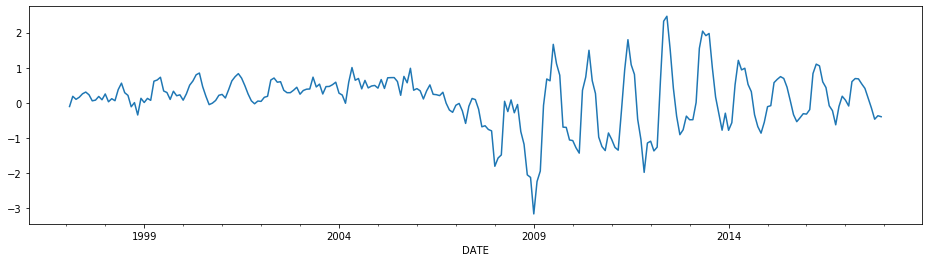

In [30]:
chicago["PriceIndex"].plot(figsize=(16,4));
plt.show()
eval_stationary(chicago["PriceIndex"])

#applying rolling mean
window = 2
new_name = "PriceIndex"+"_roll_"+ str(window)
chicago[new_name] = chicago["PriceIndex"] - chicago["PriceIndex"].rolling(window = window).mean()

#plot result
chicago[new_name].plot(figsize=(16,4));
eval_stationary(chicago[new_name])

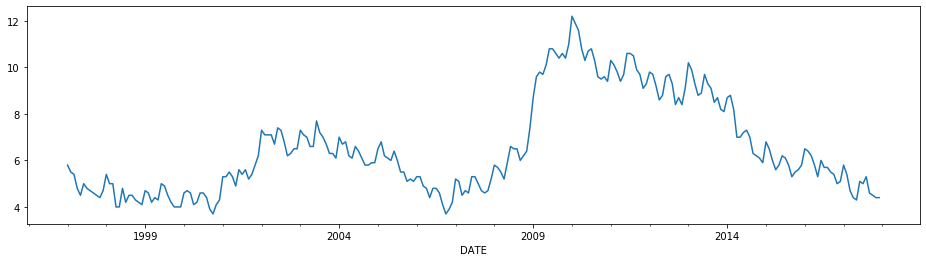

p-value for Dickey-Fuller test: 0.251
Series is stationary?: No
p-value for Dickey-Fuller test: 0.012
Series is stationary?: Yes


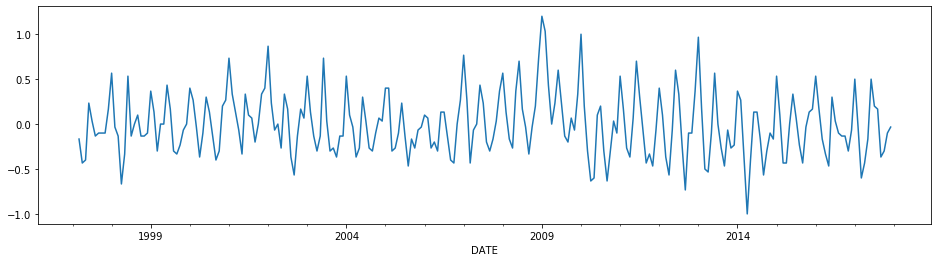

In [32]:
chicago["Unemployment"].plot(figsize=(16,4));
plt.show()
eval_stationary(chicago["Unemployment"])

#applying rolling mean
window = 3
new_name = "Unemployment"+"_roll_"+ str(window)
chicago[new_name] = chicago["Unemployment"] - chicago["Unemployment"].rolling(window = window).mean()

#plot result
chicago[new_name].plot(figsize=(16,4));
eval_stationary(chicago[new_name])